# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

### Objective:

#### About the dataset:
Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer

The objective associated with this dataset is to train a model that can classify patients who underwent surgery for breast cancer into class labels- survived and not survived.

Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

In [198]:
# import matplotlib
# matplotlib.use('nbagg')

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import mpld3
# mpld3.enable_notebook()

In [199]:
# after printing the columns with df.columns, I found that the feature names were not given in the dataset
# so I set the column names for unambiguity.
col_names = ['Age', 'Year of Operation', 'Axillary nodes detected', 'Survival Status']
df = pd.read_csv('dataset/haberman.csv', names = col_names) # names parameter sets the names of the columns/features

In [200]:
df.shape

(306, 4)

#### There are 360 examples (datapoints) and 4 features

In [201]:
df.head()

,Age,Year of Operation,Axillary nodes detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [202]:
df.tail()

,Age,Year of Operation,Axillary nodes detected,Survival Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [203]:
df.columns

Index(['Age', 'Year of Operation', 'Axillary nodes detected',
       'Survival Status'],
      dtype='object')

#### As mentioned during the lecture, imbalanced datasets require slightly differnet data analysis as compared to balanced datasets. So, it is important to check what kind of dataset we are working with:

In [204]:
df['Survival Status'].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

#### The above dataset is fairly imbalanced- number class 1 examples/data_points (225) is much more than the number of class-2 examples, will have to look out for Analysis techniques that might not make sense for such datasets

# 2-D Scatter Plot

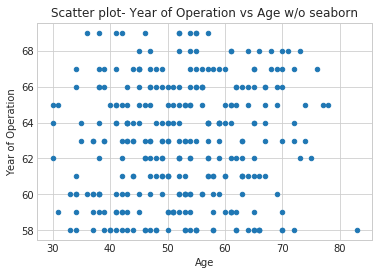

In [205]:
df.plot(kind = 'scatter', x = 'Age', y = 'Year of Operation')
plt.title('Scatter plot- Year of Operation vs Age w/o seaborn')
plt.show()

### Observation

Years of Operation varies from 1958 to 1967
Age varies from 30 to 85

The above plot does not serve anything other than some scattered blue lines and range of values. The idea of deriving ideas from this plot does not make any sense since a lot of better information can be derived from sns plots along with the above information as well.
Since plotting a scatter plot for any pair of features woud not be as productive for this case, I will switch to
using Seaborn plotting API for plotting all possible pairs.

#### Using Seaborn to plot the data points so that each datapoints belonging to different classses as coloured differently, and datapoints belonging to the same class are colored in the same color

#### Seaborn Scatter plot-1. Age and Years of Operation: Age on x-axis and Years of Operation on y-axis

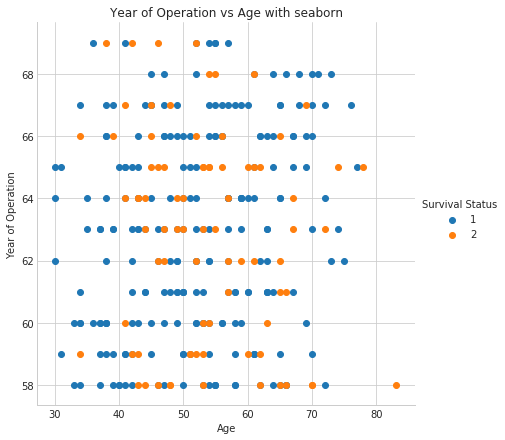

In [206]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', size = 6)\
    .map(plt.scatter, 'Age', 'Year of Operation')\
    .add_legend()
plt.title('Year of Operation vs Age with seaborn')
plt.show()

### Observation
Separating any of the classes does not look as simple. No linear line, in fact, even a curve seems to be incapable of making out a discerning decision boundary that can seperate the two classes.
Few other ob

### Conclusion
Age and Years of Operation are insufficient to take any kind of classification decision for the dataset

#### Seaborn Scatter plot-2. Age and Axillary nodes detected: Age on x-axis and Axillary nodes detected on y-axis

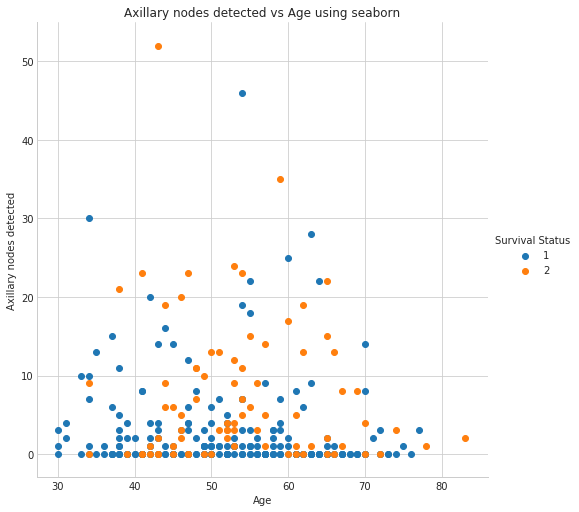

In [207]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', size = 7)\
    .map(plt.scatter, 'Age', 'Axillary nodes detected')\
    .add_legend()
plt.title('Axillary nodes detected vs Age using seaborn')
plt.show()

In [235]:
df['Axillary nodes detected'].value_counts()[:10]

0    136
1     41
2     20
3     20
4     13
6      7
7      7
8      7
5      6
9      6
Name: Axillary nodes detected, dtype: int64

### Observation and Conclusion

Since, most of the points on the above plot have value for 'Axillary nodes detected' as 0s and 1s, most of the datapoints have value of 'Axillary nodes detected' as 0 and 1 in the df(0 has more frequency of occurrence than 1), verified by printing by actual value counts. Also, from the plot we can say that most of the axillary nodes detected were less than 10 in number, this count decreases even more after 20. After age 70, the number of axillary nodes never crosses 5.

From the plot it is clear that we cannot draw any line or a curve that can discern the two classes easily.

#### Seaborn Scatter plot-3. Year of Operation and Axillary nodes detected: Year of Operation on x-axis and Axillary nodes detected on y-axis

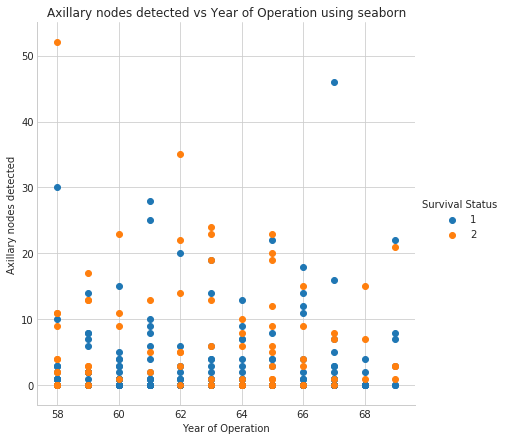

In [209]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', size = 6)\
    .map(plt.scatter, 'Year of Operation', 'Axillary nodes detected')\
    .add_legend()
plt.title('Axillary nodes detected vs Year of Operation using seaborn')
plt.show()

### Observation

Apart of range of values for different age groups, not much information can be gained.

No discerining decision boundary seems to be possible that can be drawn to distinguish the two classes.

# Pair plots


#### What we achieved using individual scatter plots can be achieved using pair plots. Instead of scatter plots, in order to do analysis taking two independent variables at a time, pair plots could be a better option to go with if there are more than two independent variables (want your feedback on this) .

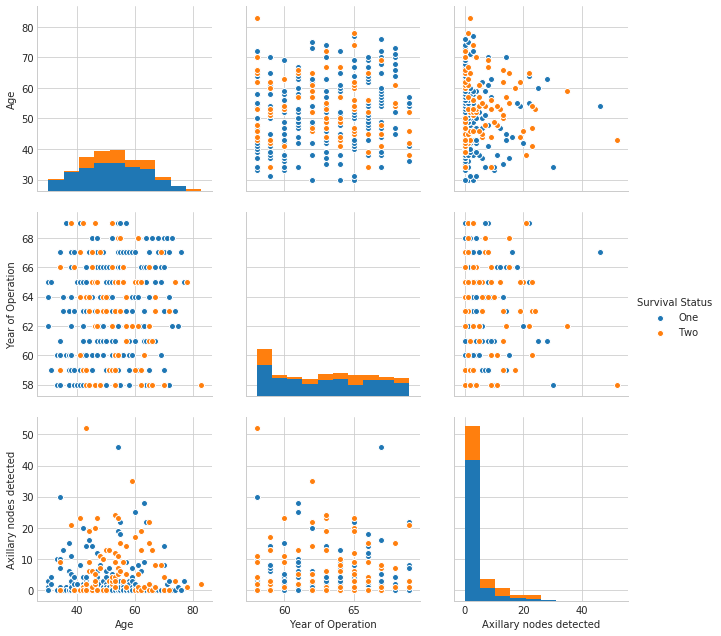

In [210]:
# Since the class label is also numerical, pairplot() plots pairplots corresponding to 'Survival Status' as well.
# Therefore, we need to make our program avoid from doing this. We either can change the labels in Survival Status
# to string, or we can simply not consider the this column for plotting. The latter is difficult to be done as
# we need to pass the dataframe that we want to plot to the sns.pairplot() method. If we choose to pass the df w/o
# Survival Status, then hue = 'Survival Status' would raise an error since this column will not be found. Hence,
# we need to go with doing the former.

# Converting values of Survival Status into string type

## doing this does not work,Py seems to be converting string 1s and 2s to numerical 1s and 2s automatically
# df['Survival Status'] = df['Survival Status'].apply(lambda x: '1' if x == 1 else '2')

df['Survival Status'] = df['Survival Status'].apply(lambda x: 'One' if x == 1 else 'Two')

plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Survival Status', size = 3)
plt.show()

### Observation and conclusions:
Obtained all the 3 scatter plots that we initally had plotted one-by-one earlier individually.

Finally,

No two features seem to be able to discern between the two classes.

# Histogram, PDF and CDF
#### 1D plotting (ie, plotting with respect to one independent variable)

#### Histograms
To check how a given attribute separates the classes 

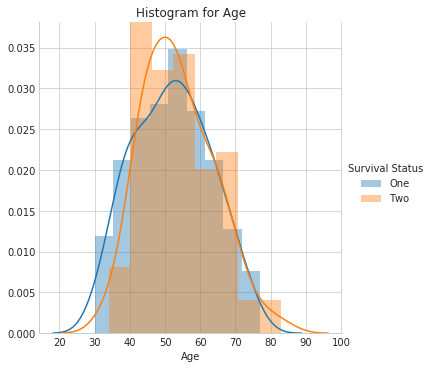

In [211]:
sns.FacetGrid(df, hue = 'Survival Status', size = 5)\
    .map(sns.distplot, 'Age')\
    .add_legend()
plt.title('Histogram for Age')
plt.show()

#### sns histogram with hue = 'Survival Status' represents how often a particular window of values occur. It does  not give the actual count. It comes with a pdf plot as well, which is the smoothened out histogram.

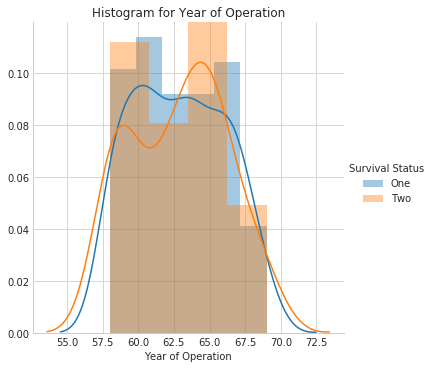

In [212]:
sns.FacetGrid(df, hue = 'Survival Status', size = 5)\
    .map(sns.distplot, 'Year of Operation')\
    .add_legend()
plt.title('Histogram for Year of Operation')
plt.show()

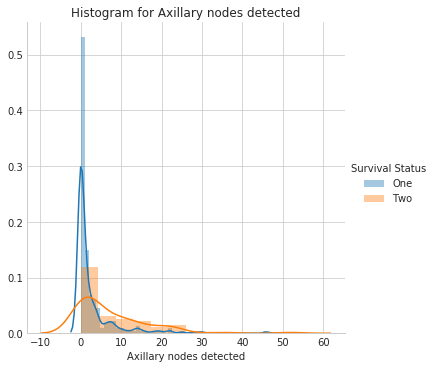

In [213]:
sns.FacetGrid(df, hue = 'Survival Status', size = 5)\
    .map(sns.distplot, 'Axillary nodes detected')\
    .add_legend()
plt.title('Histogram for Axillary nodes detected')
plt.show()

### Observation
There is a crazy overlap between the histograms corresponding to each class for all the three features!
"This is scary!".
The trivial observations that there are more datapoints with 'Axillary nodes detected' values <=5 and these values are even lower after 15, could be made using scatter plots as well.



## CDF
To check for a given class, how the number of individuals vary with the values of an attribute

In [214]:
df.columns

Index(['Age', 'Year of Operation', 'Axillary nodes detected',
       'Survival Status'],
      dtype='object')

#### For class-1 (patients who survived for more than 5 yrs): PDF and CDF for Age

Deciding number of bins (checked the link given in a reply done by AAIC team on a comment, the video in that link said, we generally choose 5 to 20 bins- 5 more small datasets and 20 for big. Since in the lecture video, 10 bins were chosen for 150 datapoints, and 306 datapoints do not compare to big datasets, I stick to 10 bins). 

In [215]:
print('Max age: ' + str(df['Age'].max()), '\nMin age: ' + str(df['Age'].min()))
print('Size of data to be binnned: ' + str(df['Age'].shape))

Max age: 83 
Min age: 30
Size of data to be binnned: (306,)


[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


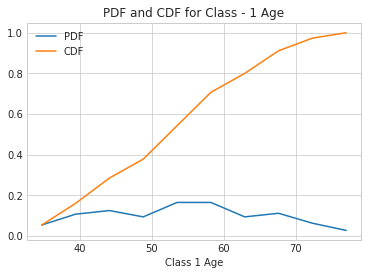

In [216]:
df_class_1 = df[df['Survival Status'] == 'One']

counts, bin_edges = np.histogram(df_class_1['Age'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF')
plt.plot(bin_edges[1:], cdf, label = 'CDF')
plt.xlabel('Class 1 Age')
plt.title('PDF and CDF for Class - 1 Age')
plt.legend()
plt.show()

### Observation

From the PDF above, we can infer that most people who belonged to class 1 (survived for more than 5 yrs) belonged to the age group 50 to 60 yrs. From the CDF, about 80% of patients in class 1 are under the age of 65 (or slightly less than 65, greater than 60). On the other hand, all the patients of class 1 fall under the age of 80 (or under the age of 77-78).

#### For class-2 (patients who could survived for 5 yrs): PDF and CDF for Age

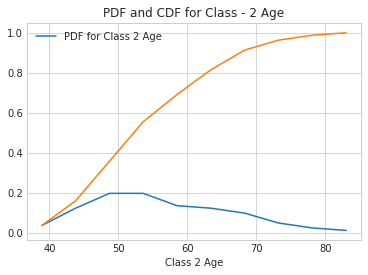

In [217]:
df_class_2 = df[df['Survival Status'] == 'Two']

# print(df_class_2)

counts, bin_edges = np.histogram(df_class_2['Age'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for Class 2 Age')
plt.xlabel('Class 2 Age')
plt.plot(bin_edges[1:], cdf)
plt.title('PDF and CDF for Class - 2 Age')
plt.legend()
plt.show()

### Observation:

From the above PDF plot, we see that most people who belonged to class 2 (did not survive for 5 yrs) were of the age group 45 to 58. If we compare this with the plot for class 1, we find that there is not much difference as most people who survived were of the age group 50 to 60 yrs.

The CDF also crosses 80% for age slightly less than 65 but more than 60 (similar to class 1 patients). 
However, there are patients of age more than 80 in class 2.

#### Plotting PDF and CDF of Age for both class 1 as well as class 2 in the same plot

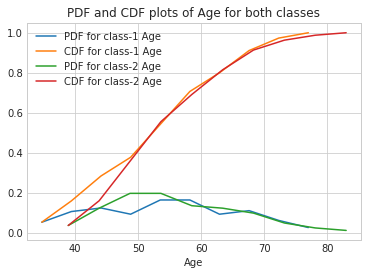

In [218]:
counts, bin_edges = np.histogram(df_class_1['Age'], bins= 10, density = True)
# print(counts)
# print(bin_edges)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.title('PDF and CDF plots of Age for both classes')
plt.plot(bin_edges[1:], pdf, label = 'PDF for class-1 Age')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class-1 Age')
plt.xlabel('Age')

counts, bin_edges = np.histogram(df_class_2['Age'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for class-2 Age')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class-2 Age')
plt.legend()
plt.show()


### From the plots for class-1 and class-2 wrt Age attribute
We can say that it is difficult to distinguish the two classes using any rule based on Age. This is what we found when we plotted histogram.

After we plot PDFs and CDFs for both the classes wrt age attribute, it becomes apparent that it is very difficult to discern the two classes using Age attribute (no if-then rules possible).

#### For class-1 (patients who survived for more than 5 yrs): PDF and CDF for Year of Operation

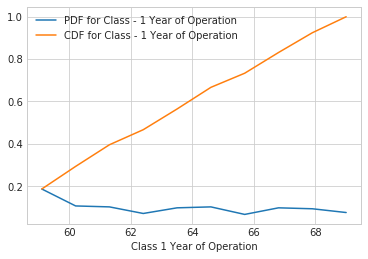

In [219]:
counts, bin_edges = np.histogram(df_class_1['Year of Operation'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for Class - 1 Year of Operation')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Class - 1 Year of Operation')
plt.xlabel('Class 1 Year of Operation')
plt.legend()
plt.show()

#### For class-2 (patients who could not survive for 5 yrs): PDF and CDF for Year of Operation

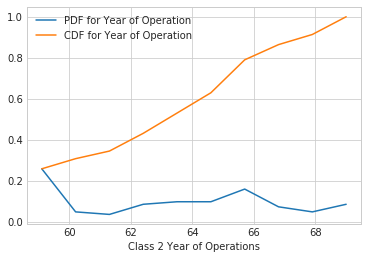

In [220]:
counts, bin_edges = np.histogram(df_class_2['Year of Operation'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for Year of Operation')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Year of Operation')
plt.legend()
plt.xlabel('Class 2 Year of Operations')
plt.show()

#### Plotting PDF and CDF for Year of Operations for both class-1 and class-2 in the same plot

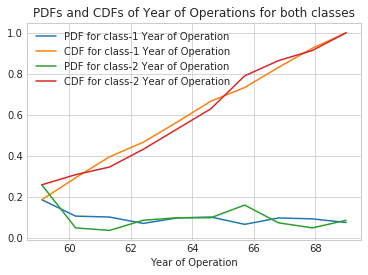

In [221]:
counts, bin_edges = np.histogram(df_class_1['Year of Operation'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.title('PDFs and CDFs of Year of Operations for both classes')
plt.plot(bin_edges[1:], pdf, label = 'PDF for class-1 Year of Operation')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class-1 Year of Operation')
plt.xlabel('Year of Operation')

counts, bin_edges = np.histogram(df_class_2['Year of Operation'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for class-2 Year of Operation')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class-2 Year of Operation')
plt.legend()
plt.show()

### Observation:

From the above plots (individual plots for both classes wrt Year of Operation as well as from plotting both together in a single plot), we find that it is not possible to derive any kind of classification rules for the two classes using Year of Operation feature alone. We concluded the same thing when we plotted the histograms also.

#### For class-1 (patients who survived for more than 5 yrs): PDF and CDF for Axillary nodes detected

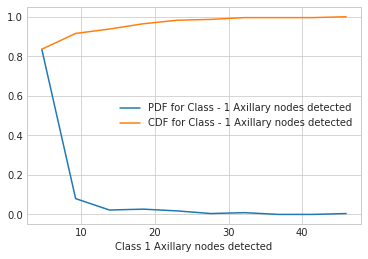

In [222]:
counts, bin_edges = np.histogram(df_class_1['Axillary nodes detected'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for Class - 1 Axillary nodes detected')
plt.plot(bin_edges[1:], cdf, label = 'CDF for Class - 1 Axillary nodes detected')
plt.xlabel('Class 1 Axillary nodes detected')
plt.legend()
plt.show()

### Observation:
We observe that in class-1, the 10 is the most frequent value for Axillary nodes detected (from PDF).

From the CDF, we can say that 80% of the patients were detected with less than 2 or 3 (atleast less than 5). This could be useful information if we see some different trend in values of Auxilliary nodes detected for class 2.

#### For class-2 (patients who could not survive for 5 yrs): PDF and CDF for Axillary nodes detected

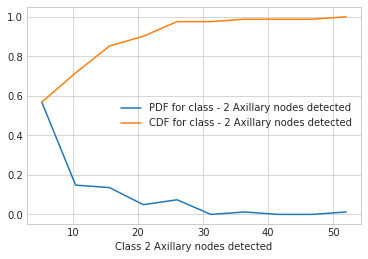

In [223]:
counts, bin_edges = np.histogram(df_class_2['Axillary nodes detected'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for class - 2 Axillary nodes detected')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class - 2 Axillary nodes detected')
plt.xlabel('Class 2 Axillary nodes detected')
plt.legend()
plt.show()

### Observation:
From the PDF, most of the patients had Axillary nodes detected value less than 10, which is disheartening because we got similar observations for class-1 also.
From the CDF, 80% of the patients were detected with less than (atleast) 15 axillary nodes. Although class-1 had 80% of its patients with less than 5 axillary nodes, we still need to check as the difference is not too much.

#### Plotting the PDFs and CDFs of Axillary nodes detected for both the classes-1 and 2

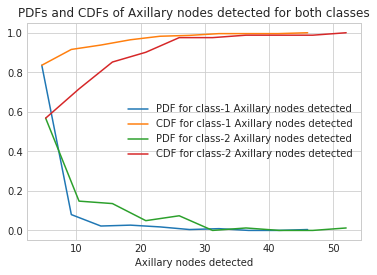

In [224]:
counts, bin_edges = np.histogram(df_class_1['Axillary nodes detected'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.title('PDFs and CDFs of Axillary nodes detected for both classes')
plt.plot(bin_edges[1:], pdf, label = 'PDF for class-1 Axillary nodes detected')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class-1 Axillary nodes detected')

counts, bin_edges = np.histogram(df_class_2['Axillary nodes detected'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = 'PDF for class-2 Axillary nodes detected')
plt.plot(bin_edges[1:], cdf, label = 'CDF for class-2 Axillary nodes detected')
plt.xlabel('Axillary nodes detected')

plt.legend()
plt.show()

### Observation:

Although 80% class-1 patients had number of axiliary nodes detected < 5, 60% of class-2 patients also had the same number of detections. PDF is all overlapping. Any rule based on this would be highly full of errors. Hence, no classification rules can be made.

# Box Plots

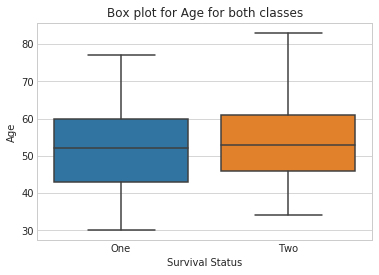

In [225]:
sns.boxplot(x = 'Survival Status', y = 'Age', data = df)
plt.title('Box plot for Age for both classes')
plt.show()

### Observation

For class - 1: Age = 60 is the 75th percentile, so 75% of the datapoints (representing patients) are of age less than 60 who survived for more than 5 years. 50th percentile looks to be 52 or 53 (less than 55), while 25th percentile value is some value less than 45. Most of the datapoints lie within 30 and around 78 (ie, within the whiskers)

For class - 2: 75th percentile is little more than 60 (looks like 61 or 62), 50th percentile is almost the same value as the 50th percentile of class 2. 25th percentile is some value more than 45. Most of the datapoints lie within 82 (or 83, less than 85) and around 35 (ie, within the whiskers).

Class - 1 box plot has more Inter-quartile Range than class - 2.

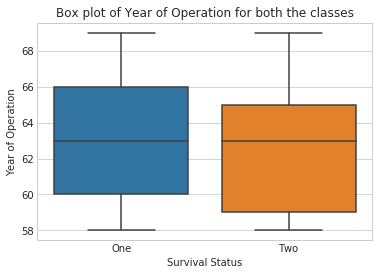

In [226]:
sns.boxplot(x = 'Survival Status', y = 'Year of Operation', data = df)
plt.title('Box plot of Year of Operation for both the classes')
plt.show()

### Observation

For class - 1: 75th percentile is the year 1966. That is, 75% of the people survived for more than 5 years underwent surgery before 1966. 1963 is the 50th percentile year of percetile and 25% of the patients who survived for more than 5 years were operated before 1960. 

For class 2: Those who did not survive, 75% of them were operated before 1965. This class has the same 50th percentile as class - 1- 1963, ie, 50% of the people who did not survive were operated before 1963. 25th percentile is year 1959.

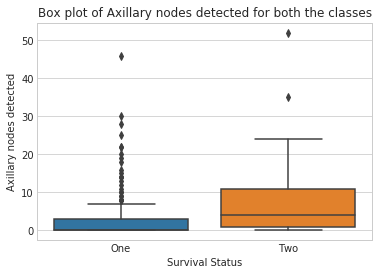

In [227]:
sns.boxplot(x = 'Survival Status', y = 'Axillary nodes detected', data = df)
plt.title('Box plot of Axillary nodes detected for both the classes')
plt.show()

### Observation

For class 1: Taking reference from the link https://imgur.com/fssoM3U posted by the AAIC team on the comment of Video 9,17, the first thing that we could say is that there are quite a number of outliers in the values of Axillary nodes detected attribute. Finding Mean and Median of this feature's values would be an interesting comparison to do.
The 75th percentile looks to be 4, that is 75% percent of the people who underwent surgery and survived for more than 5 years had less than atleat 5 axillary nodes detected. Since the top whisker is below 10, so most survivors had less than 10 detections of axillary nodes. 

We did not, however get 3 lines in the box for class - 1 as we normally do. Let us check what is the median (50th percentile) and 25th percentile in the following cell.


In [228]:
print(np.median(df_class_1['Axillary nodes detected']))
print(np.percentile(df_class_1['Axillary nodes detected'], 25))

# Let's also check the mean
print(np.mean(df_class_1['Axillary nodes detected']))

0.0
0.0
2.7911111111111113


### Observation continues for box plots for Axillary nodes detected...

We find that the 25th as well as 50th percentile (aka median), both are zero. So, we can say that there are 50% people in class - 1 (who survived for more than 5 yrs after surgery) who had zero axillary node detections. However, we cannot make a classification rule like- if number of axillary nodes == 0, then class = class-1 because, still 50% of people in class-1 have more than 0 detections, and also from the box plot done for class - 2, we can clearly see that the lower whisker touches the x-axis (0 number of axillary nodes). This means with this rule, we shall predict some class-2 people as class-1 => more error in predictions. 
Additionally, the deviation of mean of the values from the median of Axillary node detections of class - 1 patients show the presence of outliers.

For class - 2: 75th percentiles is greater than 10 (looks like 12). 50th percentile is slighly more than the 75th percentile of class-1, around 5. This means that 50% of the people who did not survive had number of node detections more than 5. This is also not a plausible base to make a rule on as then, we shall get 50% class-2 labels which we shall directly miss. Besides, the upper whisker of class-1 box plot is around 8. So a rule like if axillary_nodes_detected > 5 => class-2 would cause class-1 patients to be labelled as class-2.
However, above 8 (upper whisker of class - 1 box plot) we see a lot of datapoints that were marked as outliers for class - 1. Based on how important or what kind kind of role they play in making predictions we could make a rule like if axillary_nodes_detected > 8 and axillary_nodes_detected < 25 (upper whisker of class-2), then class = class-2. However, this would be true in the case when outliers are ignored.
#### Looking forward to learn about outliers!

# Violin Plots

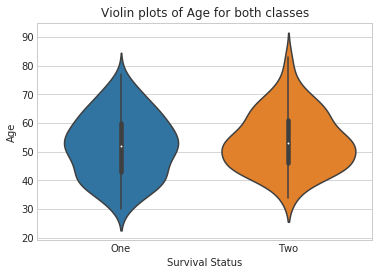

In [232]:
sns.violinplot(x = 'Survival Status', y = 'Age', data = df)
plt.title('Violin plots of Age for both classes')
plt.show()

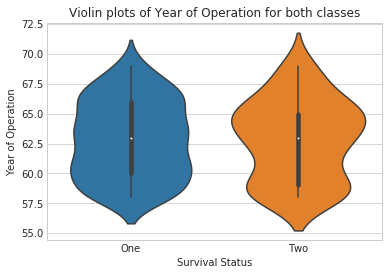

In [233]:
sns.violinplot(x = 'Survival Status', y = 'Year of Operation', data = df)
plt.title('Violin plots of Year of Operation for both classes')
plt.show()

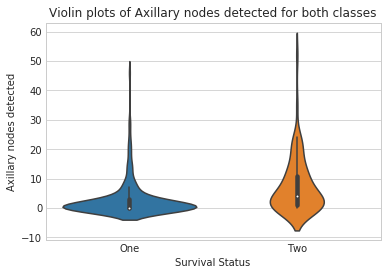

In [234]:
sns.violinplot(x = 'Survival Status', y = 'Axillary nodes detected', data = df)
plt.title('Violin plots of Axillary nodes detected for both classes')
plt.show()

### Observation

Comparing with the box plots, we get the same observation from the violin plots dark part going vertically across the center.
PDFs are also similar to the ones we obtained while plotting the histograms.
We could have gone to directly plotting violin plots instead of plotting histograms (PDFs) and box plots separately.